In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'run_snellius.sh',
 'slurm-2709578.out',
 'ref_temp.ipynb',
 'slurm-2709647.out']

In [6]:
os.listdir('/data2/imau/users/jasper/ihesp/hrmip/1deg/hist/tas/')

['download',
 'download_hrmip_lr_hist.o101628',
 'wget-log',
 'tas_Amon_CESM1-CAM5-SE-LR_hist-1950_r1i1p1f1_gn_195001-201412.nc']

In [6]:
ds = xr.open_dataset('/data2/imau/users/jasper/ihesp/hrmip/0.25deg/cont/tas/tas_Amon_CESM1-CAM5-SE-HR_control-1950_r1i1p1f1_gn_005501-015512.nc')

/usr/local/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


In [38]:
ds.tas.encoding['missing_value'] = ds.tas.encoding['missing_value'].astype('float32')

In [40]:
ds.tas.encoding['missing_value'] == ds.tas.encoding['_FillValue']

True

In [41]:
ds.tas.isel(time=0).to_netcdf("/nethome/6272487/tas_000.nc")

In [45]:
# Load data
root = '/data2/imau/users/jasper/ihesp'

fname1 = root+'/hrmip/0.25deg/hist/tas/tas_Amon_CESM1-CAM5-SE-HR_hist-1950_r1i1p1f1_gn_195001-201412.nc'
fname2 = root+'/hrmip/0.25deg/rcp8.5/tas/tas_Amon_CESM1-CAM5-SE-HR_highres-future_r1i1p1f1_gn_201501-205012.nc'
#ds_hrmip_hr = xr.open_mfdataset([fname1,fname2], use_cftime=True, combine='by_coords')

fname1 = root+'/hrmip/1deg/hist/tas/tas_Amon_CESM1-CAM5-SE-LR_hist-1950_r1i1p1f1_gn_195001-201412.nc'
fname2 = root+'/hrmip/1deg/rcp8.5/tas/tas_Amon_CESM1-CAM5-SE-LR_highres-future_r1i1p1f1_gn_201501-205012.nc'
#ds_hrmip_lr = xr.open_mfdataset([fname1,fname2], use_cftime=True, combine='by_coords')

fname1 = root+'/transient/0.25deg/hist/trefht/*.nc'
fname2 = root+'/transient/0.25deg/rcp8.5/trefht/*.nc'
#ds_trans_hr_hist = xr.open_mfdataset(fname1, combine='by_coords', use_cftime=True)
#ds_trans_hr_rcp = xr.open_mfdataset(fname2, combine='by_coords', use_cftime=True)

area_hr = ds_trans_hr_hist.area.isel(time=0)
area_lr = xr.open_dataset('/nethome/6272487/sai-git/sai/prep/data/ne30_g16.grid.nc').area

In [2]:
ds_hrmip_hist = xr.open_dataset('/data2/imau/users/jasper/ihesp/hist/hrmip/tas_Amon_CESM1-CAM5-SE-HR_hist-1950_r1i1p1f1_gn_195001-201412.nc', use_cftime=True)
ds_hrmip_hist = ds_hrmip_hist.groupby('time.year').mean('time')
ds_hrmip_hist = ds_hrmip_hist.rename({'tas':'TREFHT'})

ds_hrmip_fut = xr.open_dataset('/data2/imau/users/jasper/ihesp/hrmip/rcp8.5/tas_Amon_CESM1-CAM5-SE-HR_highres-future_r1i1p1f1_gn_201501-205012.nc', use_cftime=True)
ds_hrmip_fut = ds_hrmip_fut.groupby('time.year').mean('time')
ds_hrmip_fut = ds_hrmip_fut.rename({'tas':'TREFHT'})

ds_hrmip_ext = xr.open_dataset('/data2/imau/users/jasper/ihesp/rcp8.5/hrmip/B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-2051-2100.014.cam.h0.TREFHT.205101-210012.nc', use_cftime=True)
ds_hrmip_ext = ds_hrmip_ext.groupby('time.year').mean('time')
ds_hrmip_ext = ds_hrmip_ext.set_coords(('lat','lon'))

Tref_hrmip = xr.concat((ds_hrmip_hist.TREFHT, ds_hrmip_fut.TREFHT, ds_hrmip_ext.TREFHT), dim='year')

/usr/local/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/usr/local/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


In [51]:
tasga_hrmip_hr = (ds_hrmip_hr.tas * (area_hr/area_hr.sum('ncol'))).sum('ncol').groupby(ds_hrmip_hr.time.dt.year).mean().compute()
tasga_hrmip_lr = (ds_hrmip_lr.tas * (area_lr/area_lr.sum('ncol'))).sum('ncol').groupby(ds_hrmip_lr.time.dt.year).mean().compute()
tasga_trans_hr_hist = (ds_trans_hr_hist.TREFHT * (area_hr/area_hr.sum('ncol'))).sum('ncol').groupby(ds_trans_hr_hist.time.dt.year).mean().compute()
tasga_trans_hr_rcp = (ds_trans_hr_rcp.TREFHT * (area_hr/area_hr.sum('ncol'))).sum('ncol').groupby(ds_trans_hr_rcp.time.dt.year).mean().compute()

In [54]:
tasga_trans_hr = xr.concat((tasga_trans_hr_hist, tasga_trans_hr_rcp), dim='year')
tasga_trans_hr[tasga_trans_hr > 1e35] = np.nan
tasga_trans_hr[150]

In [5]:
ds_trans_hist = xr.open_mfdataset('/data2/imau/users/jasper/ihesp/hist/hr/mon/TREFHT/*.TREFHT.*.nc', combine='by_coords', use_cftime=True)
ds_trans_hist = ds_trans_hist.groupby('time.year').mean('time')

ds_trans_fut = xr.open_mfdataset('/data2/imau/users/jasper/ihesp/rcp8.5/hr/*.TREFHT.*.nc', combine='by_coords',use_cftime=True)
ds_trans_fut = ds_trans_fut.groupby('time.year').mean('time')

Tref_trans = xr.concat((ds_trans_hist.TREFHT, ds_trans_fut.TREFHT), dim='year')
Tref_trans_gm = (Tref_trans * (ds_trans_hist.area.isel(year=0)/ds_trans_hist.area.isel(year=0).sum('ncol'))).sum('ncol').data
Tref_trans_gm[Tref_trans_gm > 1e35] = np.nan

In [8]:
Tref_trans_gm = Tref_trans_gm.compute()

In [14]:
Tref_trans_gm[150] = np.nan 

In [9]:
Tref_hrmip_gm = Tref_hrmip_gm.compute()

Text(0, 0.5, 'Temperature (K)')

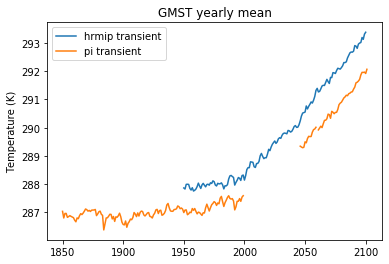

In [18]:
plt.plot(Tref_hrmip_gm.year[:-1], Tref_hrmip_gm[:-1], label='hrmip transient')
plt.plot(Tref_trans.year[:-1], Tref_trans_gm[:-1], label='pi transient')
plt.legend()
plt.title("GMST yearly mean")
plt.ylabel("Temperature (K)")

In [107]:
with open('/nethome/6272487/sai-git/sai/Tref/HadCRUT5.0Analysis_gl.txt') as f:
    lines = f.readlines()
year = [int(line.split(' ')[1]) for line in lines[::2]]
anom = [float(line.split(' ')[-1].strip('\n')) for line in lines[::2]]
tobs = [x + 13.974 + 273.15 for x in anom]
# for line in lines[::2]:
#     print(line.split(' ')[1], line.split(' ')[-1].strip('/n'))


Text(0.5, 0, 'Year')

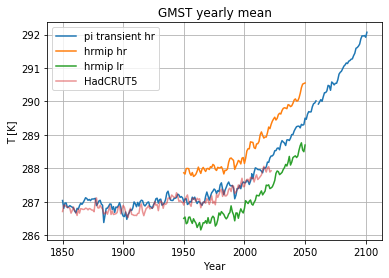

In [115]:
plt.plot(tasga_trans_hr.year[:-1], tasga_trans_hr[:-1], label='pi transient hr')
plt.plot(tasga_hrmip_hr.year, tasga_hrmip_hr, label='hrmip hr')
plt.plot(tasga_hrmip_lr.year, tasga_hrmip_lr, label='hrmip lr')
plt.plot(year, tobs, label='HadCRUT5', alpha=0.5)
plt.legend()
plt.grid()
plt.title("GMST yearly mean")
plt.ylabel("T [K]")
plt.xlabel("Year")

In [140]:
(tasga_trans_hr.sel(year=slice(1850,1899)).mean().data,
tasga_trans_hr.sel(year=slice(1950,1979)).mean().data, 
tasga_trans_hr.sel(year=slice(2010,2029)).mean().data
)

(array(286.89123304), array(287.10457898), array(288.21629812))

In [127]:
(tasga_hrmip_hr.sel(year=slice(1850,1949)).mean().data,
tasga_hrmip_hr.sel(year=slice(1950,1979)).mean().data, 
tasga_hrmip_hr.sel(year=slice(2010,2029)).mean().data
)

/usr/local/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(array(nan), array(287.94265744), array(289.1748624))

In [128]:
(tasga_hrmip_lr.sel(year=slice(1850,1949)).mean().data,
tasga_hrmip_lr.sel(year=slice(1950,1979)).mean().data, 
tasga_hrmip_lr.sel(year=slice(2010,2029)).mean().data
)

(array(nan), array(286.40850495), array(287.46338189))

In [141]:
np.mean(tobs[0:50]), np.mean(tobs[100:130]), np.nan

(286.76507999999995, 287.03326666666663, nan)